In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
#loading the dataset

(X_train, Y_train), (X_test , Y_test) =cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
#naming all the class

classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
classes[Y_train[6][0]]

'bird'

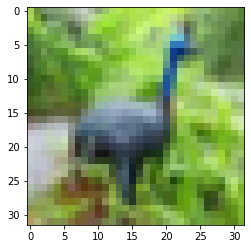

In [6]:
#visualising the data

plt.imshow(X_train[6])
#np.argmax(Y_train[4])

In [7]:
#normalising the data

X_train, X_test = X_train / 255.0 , X_test / 255.0

#converting to categorical data

Y_train , Y_test = to_categorical(Y_train) , to_categorical(Y_test)

In [8]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
model = Sequential()

#conv1
model.add(Conv2D(32 , (3,3) , activation= 'relu', kernel_initializer='he_uniform' ))
model.add(MaxPool2D((2,2)))

#conv2
model.add(Conv2D(64 , (3,3) , activation= 'relu', kernel_initializer='he_uniform' ))
model.add(MaxPool2D((2,2)))

#conv3
model.add(Conv2D(128 , (3,3) , activation= 'relu', kernel_initializer='he_uniform' ))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

#Drafting ANN Model
model.add(Dense(200 , activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(100 , activation= 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(50 , activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(25 , activation= 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(10 , activation = 'softmax'))


In [10]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(X_train , Y_train , epochs = 30 , batch_size = 32)

Epoch 1/30
1563/1563 [==============================] - 9s 4ms/step - loss: 1.9294 - accuracy: 0.2732
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3764 - accuracy: 0.5084
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1852 - accuracy: 0.5912
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0575 - accuracy: 0.6386
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9746 - accuracy: 0.6711
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9006 - accuracy: 0.6998
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8395 - accuracy: 0.7178
Epoch 8/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7901 - accuracy: 0.7373
Epoch 9/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7503 - accuracy: 0.7543
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.699

In [11]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1510 - accuracy: 0.7155


[1.150990605354309, 0.715499997138977]

In [12]:
Y_pred = model.predict(X_test)
Y_pred

array([[2.7863105e-04, 3.8127215e-05, 2.6520626e-03, ..., 5.5900851e-04,
        5.4962758e-04, 4.6699450e-04],
       [2.9470921e-03, 8.0036267e-04, 2.7510597e-04, ..., 3.6644076e-05,
        9.9272001e-01, 2.4169562e-03],
       [1.1308760e-02, 7.5384188e-01, 4.5044205e-04, ..., 1.7506984e-03,
        3.5937812e-02, 1.9474360e-01],
       ...,
       [8.6929293e-05, 8.7561224e-05, 1.9273136e-03, ..., 2.6268768e-03,
        3.6422607e-05, 4.5740941e-05],
       [1.5630774e-02, 9.3048787e-01, 6.8671242e-03, ..., 4.7508013e-04,
        2.1140402e-02, 9.3181720e-03],
       [1.3071221e-04, 2.7671078e-05, 3.1364217e-04, ..., 9.9419385e-01,
        9.2297323e-06, 3.1466168e-04]], dtype=float32)

In [13]:
#predicted

classes[np.argmax(Y_pred[90])]

'airplane'

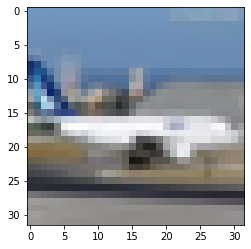

In [14]:
#visualising the prediction

plt.imshow(X_test[90])

In [15]:
#saving the model

model.save('CNN_Model_cifar')

INFO:tensorflow:Assets written to: CNN_Model_cifar/assets
